### 다중회귀분석
+ 단일 회귀분석에 비해 변수가 2개이상 증가 
+ 기술통계학이나 추론통계학 상의 주요 기법
+ 종속변수y를 보다 더 잘 설명하고 예측하기 위해 여러 독립변수x를 사용함
+ 하지만, 독립변수가 3개 이상인 경우 그래프로 표현하기 어려워지므로 보통 y = ax1 + bx2 + cx3 +d 정도로만 고려하는 것이 좋음

### 다중회귀모형 분석방법

+ 수정된 결정계수
+ 모든 회귀계수들의 유의성을 판단 : F분포
+ 개별회귀계수에 대한 평가 : t분포

In [1]:
# ex) 부동산회사에서 소유하고 있는 주택에 대해 고객들의 많은 문의사항 중 하나는 난방비가 얼마나 드냐임. 
# 난방비 가이드라인 작성을 위해 임의로 선별한 20채의 주택에 대해 다중회귀분석을 실시하시오
houses <- read.csv('csv/houses.txt')
head(houses)

# 독립변수 : 평균외부기온, 단열재, 난방사용연수
# 종속변수 : 난방비

,난방비,평균외부기온,단열재,난방사용연수
,<int>,<int>,<int>,<int>
1,250,35,3,6
2,360,29,4,10
3,165,36,7,3
4,43,60,6,9
5,92,65,5,6
6,200,30,5,5


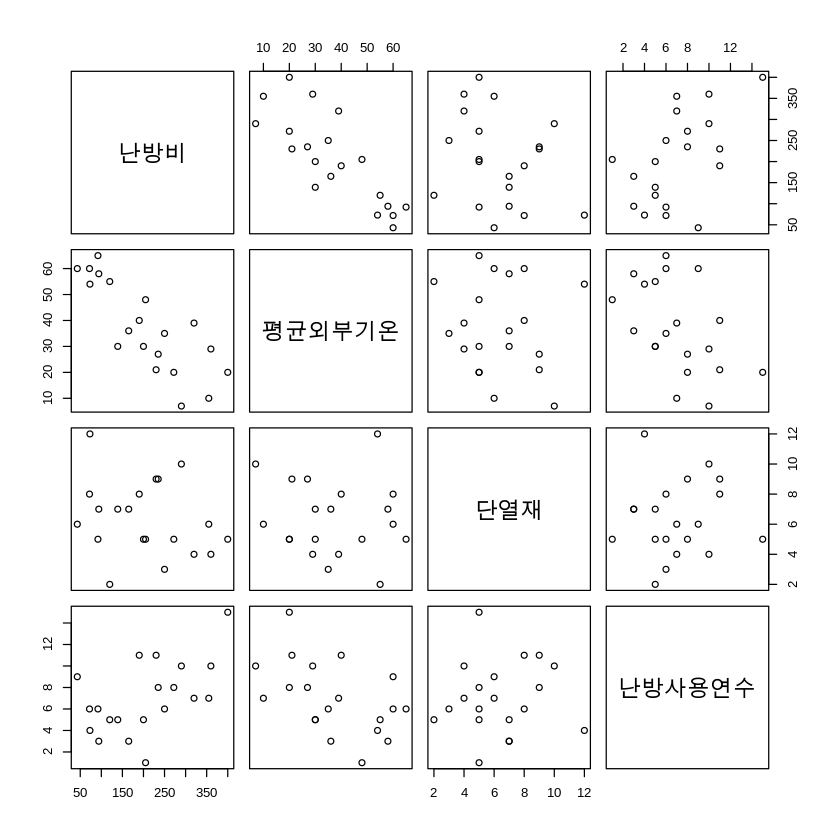

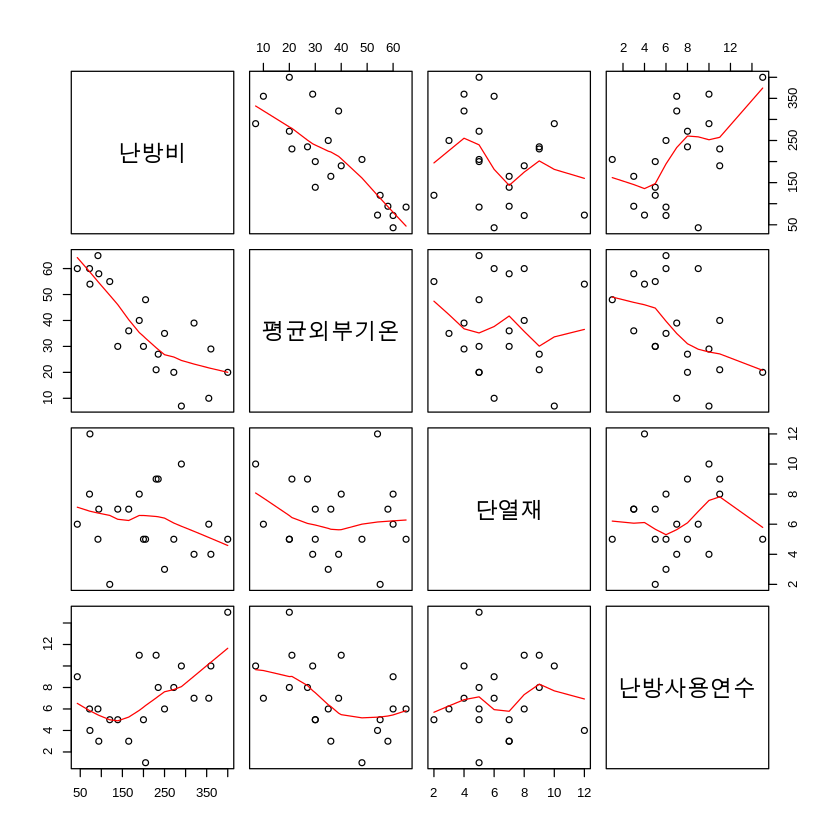

In [2]:
# 시각화
plot(houses)
pairs(houses, panel=panel.smooth)

corrplot 0.90 loaded



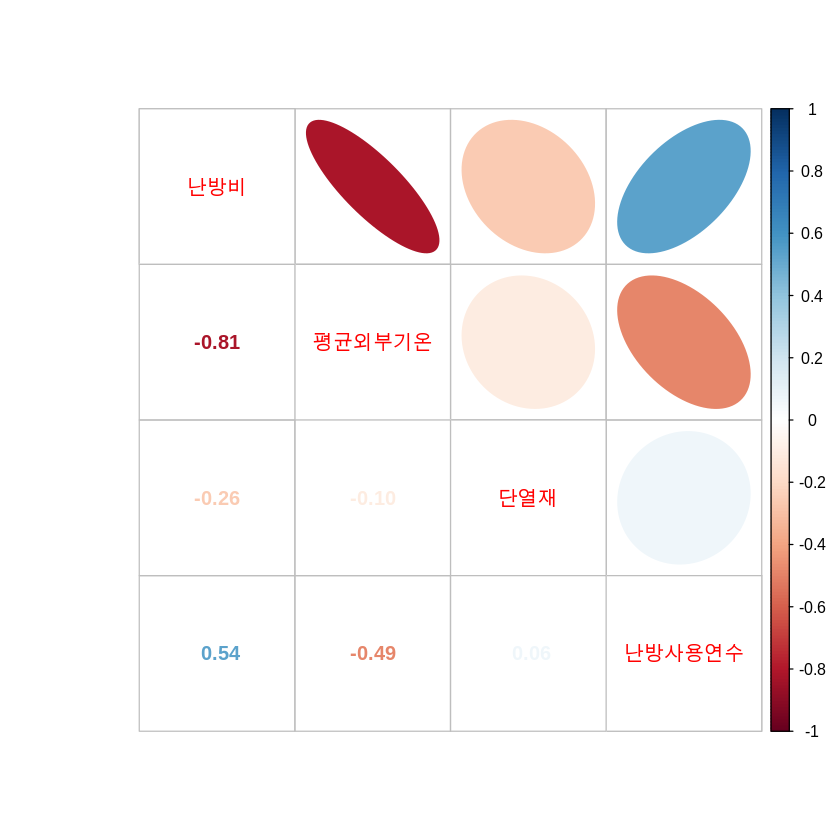

In [3]:
library(corrplot)
cor <- cor(houses)
corrplot.mixed(cor, upper='ellipse', lower='number')
# 난방비와 관련있는 변수 : 평균외부기온, 난방사용연수

In [4]:
# 다중회귀 모델 생성
# lm(종속변수~독립변수+독립변수+독립변수+....+독립변수 , data=객체)
# lm(종속변수~. , data=객체)

# m1 <- lm(houses$난방비~houses$평균외부기온+houses$단열재+houses$난방사용연수)
m2 <- lm(난방비~평균외부기온+단열재+난방사용연수, data=houses)
# m3 <- lm(난방비~., data=houses)

m2

# y = (-4.58*x1) + (-14.83*x2) + (6.1*x3) + 427.19
# 1) 평균외부기온이 1도 증가 -> 난방비는 4.5 씩 줄어듬
# 2) 단열재를 1mm씩 증가 -> 난방비는 14.8 씩 줄어듬
# 3) 난방사용연수가 1년씩 증가 -> 난방비는 6.1 씩 증가


Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [5]:
# 만일, 기온30도 단열재 두께가 5mm, 난방기연수가 10년된 주택의 예상 난방비는?
(-4.58*30) + (-14.83*5) + (6.1*10) + 427.19

[1] 276.64

In [6]:
# 회귀모델의 회귀계수 : coef
coef(m2)

(Intercept) 평균외부기온       단열재 난방사용연수 
  427.193803    -4.582663   -14.830863     6.101032

In [7]:
# 회귀모델 예측하기 : predict(모델변수, 예측유형, 입력값)
inputs <- data.frame(평균외부기온=c(30),단열재=c(5),난방사용연수=c(10))

predict(m2, newdata=inputs)                          # 예측값(fit)

predict(m2, interval='prediction', newdata=inputs) # 신뢰구간 기반 예측값 (구간추정 lwr: 낮은값, upr: 높은값)

1 
276.5699

,fit,lwr,upr
1,276.5699,162.4705,390.6693


In [8]:
# ex) 어떤 은행에서 담보주택관련 분석을 위해, 주택가격, 세대주 교육수준, 세대주 연령, 월 상환액, 세대주 성별들이 가계소득 수준과 어떤 관련이 있는지 회귀분석을 실시하시오(banks.txt)
banks <- read.csv('csv/banks.txt')
head(banks)

,Income,Value,Education,Age,Mortgage,Gender
,<dbl>,<int>,<int>,<int>,<int>,<int>
1,100.7,190,14,53,230,1
2,99.0,121,15,49,370,1
3,102.0,161,14,44,397,1
4,100.7,161,14,39,181,1
5,100.0,179,14,53,378,0
6,95.2,99,14,46,304,0


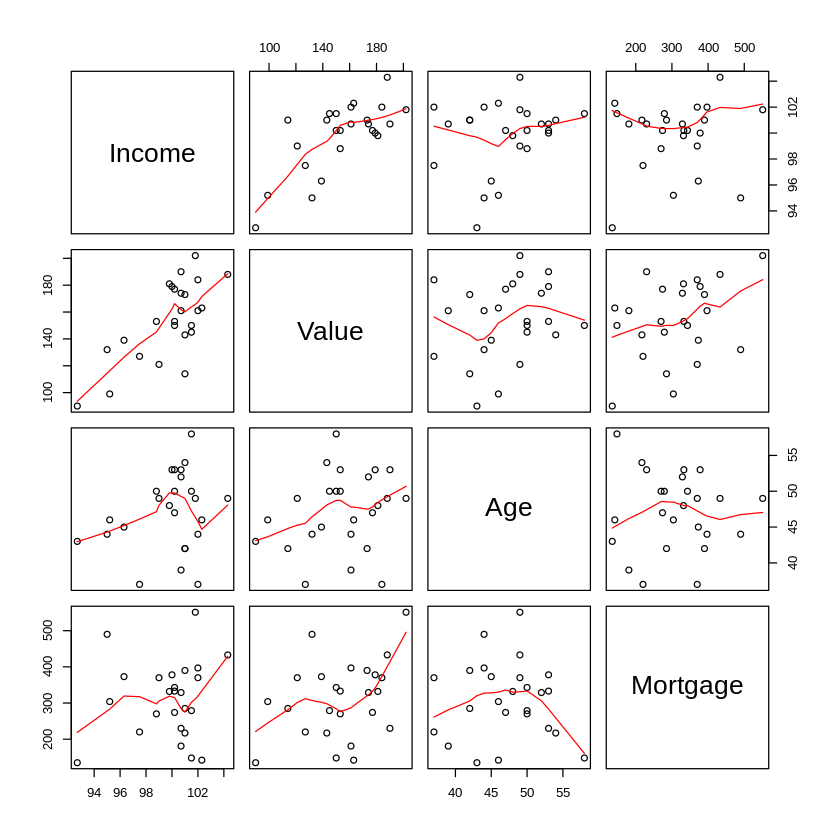

(Intercept)        Value          Age     Mortgage 
88.687414203  0.069438669  0.033873198 -0.003733621

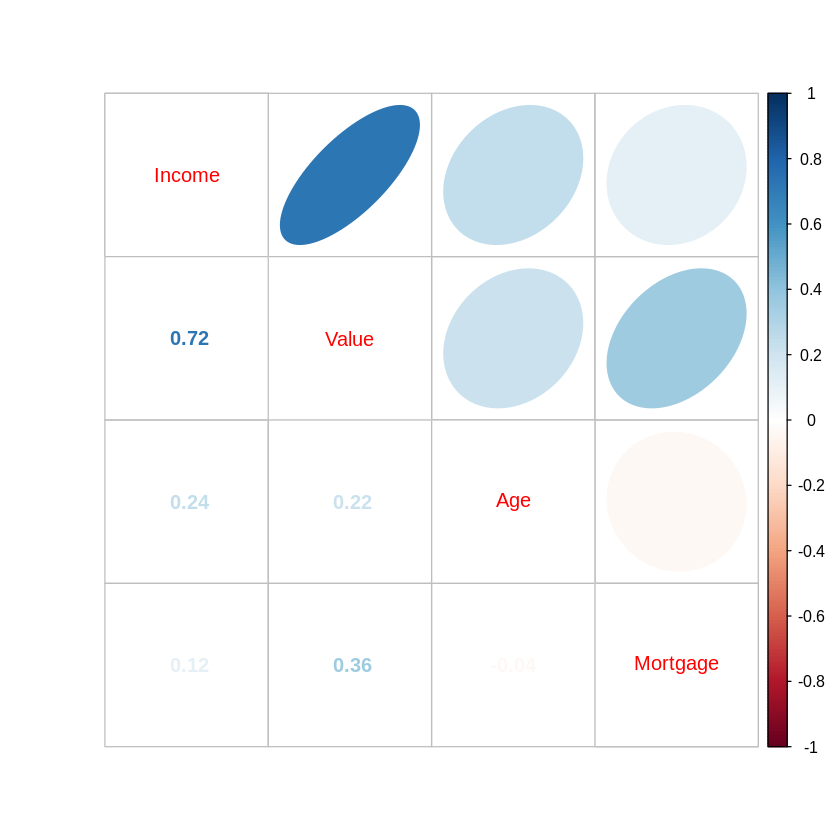

In [9]:
bank <- banks[, c(1,2,4,5)]
pairs(bank, panel=panel.smooth)

cor <- cor(bank)
corrplot.mixed(cor, upper='ellipse', lower='number')

model <- lm(Income~Value+Age+Mortgage, bank)

coef(model)

In [10]:
#y = 0.07x1 + 0.03x2 - 0.003x3 + 88.69
summary(model)
# 결정계수 : 0.5461
# 유의성 검정 : pvalue=0.0007242
# 유의성 검정 : Pr(>|t|) = 0.0007242
# y = 0.07x1 + 88.69


Call:
lm(formula = Income ~ Value + Age + Mortgage, data = bank)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1894 -1.3471  0.1877  1.2661  4.0380 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.687414   3.770847  23.519  < 2e-16 ***
Value        0.069439   0.014873   4.669 0.000131 ***
Age          0.033873   0.074430   0.455 0.653706    
Mortgage    -0.003734   0.003969  -0.941 0.357542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 21 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.4812 
F-statistic: 8.422 on 3 and 21 DF,  p-value: 0.0007242


In [11]:
# 난방비 가이드라인 작성을 위해 다중회귀분석을 실시했음
# 다중회귀모형 작성시 적절한 필요조건을 만족했는지 확인해 봄

m <- lm(난방비~., houses)

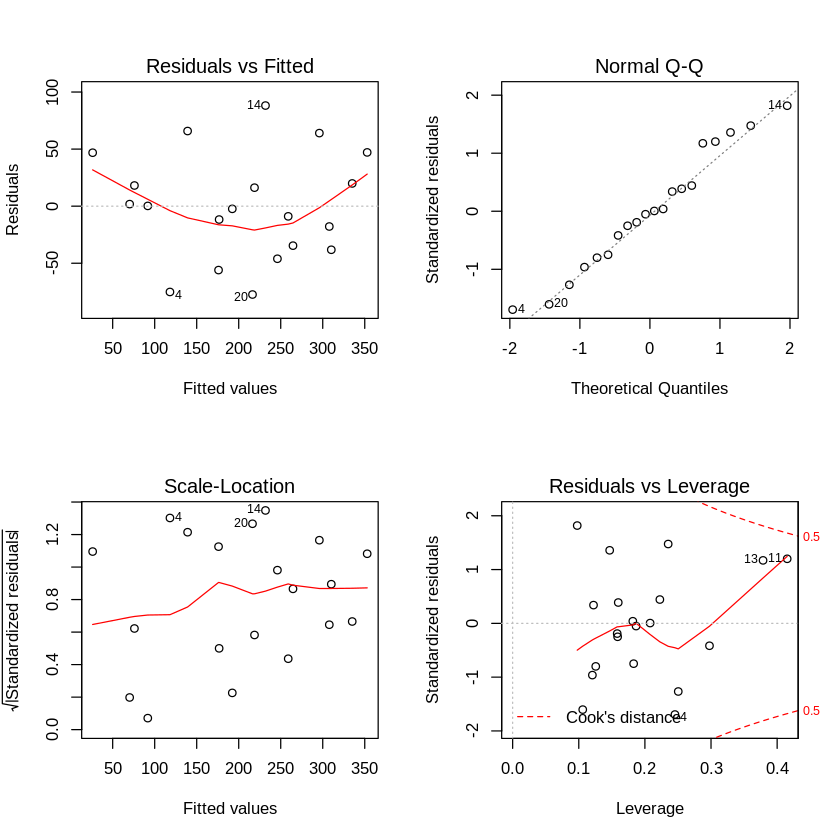

In [12]:
# 2x2 그래프를 그리기 위한 초기화
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))  
plot(m)   # 회귀모형을 분석한 4개의 그래프가 나타남!
par(.opar)

### 회귀모형 적합성 그래프
### 시간방향으로 선형성/정규성/분산성/독립성을 의미
1) 선형성 : 잔차 예측비교도

잔차를 표준화시켜서 정규분포를 따르는지 확인


2) 정규성 : 독립변수가 정규성을 띄면

잔차도 정규성을 띄는가?


3) 분산성 : 잔차 분산 비교도

독립변수의 분산이 일정하면 잔차의 분산도 일정한가


4) 독립성 : 잔차의 영향력

회귀방정식의 계수결정에 불균형한 영향을

미치는 독립변수(이상치) 존재 파악

In [13]:
summary(m)

# => 결정계수는 0.8042
# => 수정된 결정계수는 0.7675 (!)
# => 회귀모형 적합성은 몇몇의 이상치때문에 정규성, 독립성에 문제가 있는것으로 보임


Call:
lm(formula = 난방비 ~ ., data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  427.1938    59.6014   7.168 2.24e-06 ***
평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***
단열재       -14.8309     4.7544  -3.119  0.00661 ** 
난방사용연수   6.1010     4.0121   1.521  0.14786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


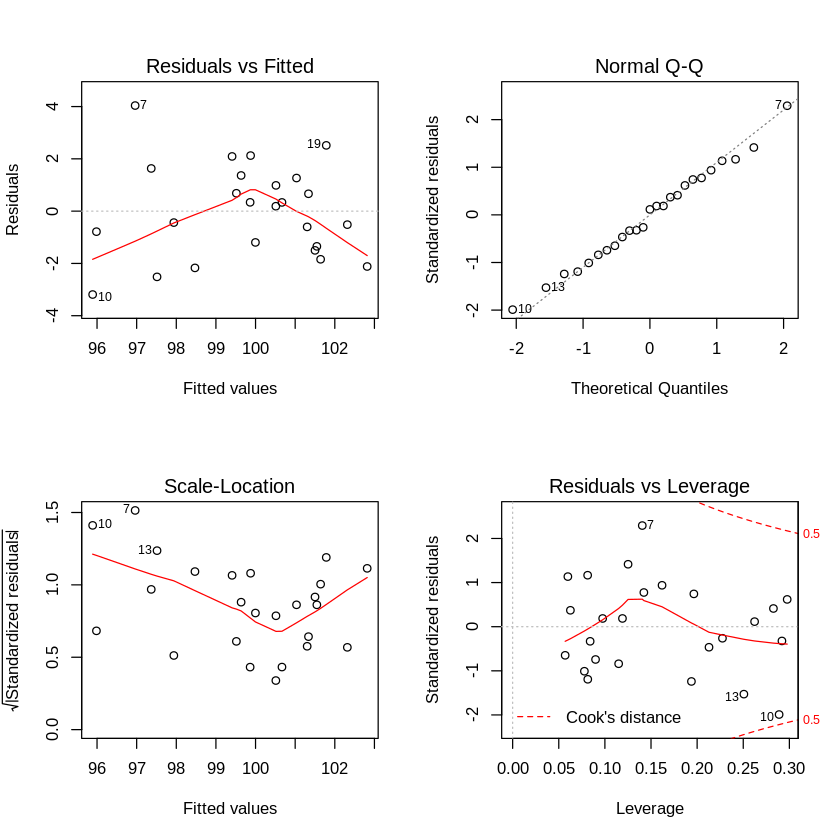

In [14]:
#담보주택관련 회귀모형에 대한 적합성 검정을 해보세요
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))  
plot(model)   # 회귀모형을 분석한 4개의 그래프가 나타남!
par(.opar)

In [15]:
# => 수정된 결정계수 : 0.4812로 모델의 결정력은 많이 낮음
# => 회귀계수는 Value만 포함하고 나머지는 제외
# => 회귀모형 적합성은 몇몇의 이상치때문에 선형성,분산성,독립성에 문제가 있는것으로 보임

In [16]:
# 미술수집가는 그림의 낙찰가격과
# 입찰자수, 보존연수와의 관계를 알아보자고 함
# 독립변수와 종속변수간에 어떤 관련이 있는지
# 회귀분석과 적합성여부를 실시하세요
# artsbuyer.txt

In [17]:
art <- read.csv('csv/artsbuyer.txt', sep='\t')
head(art)

,Painting,Price,Bidders,Age
,<int>,<int>,<int>,<int>
1,1,3470,10,67
2,2,3500,8,56
3,3,3700,7,73
4,4,3860,4,71
5,5,3920,12,99
6,6,3900,10,87


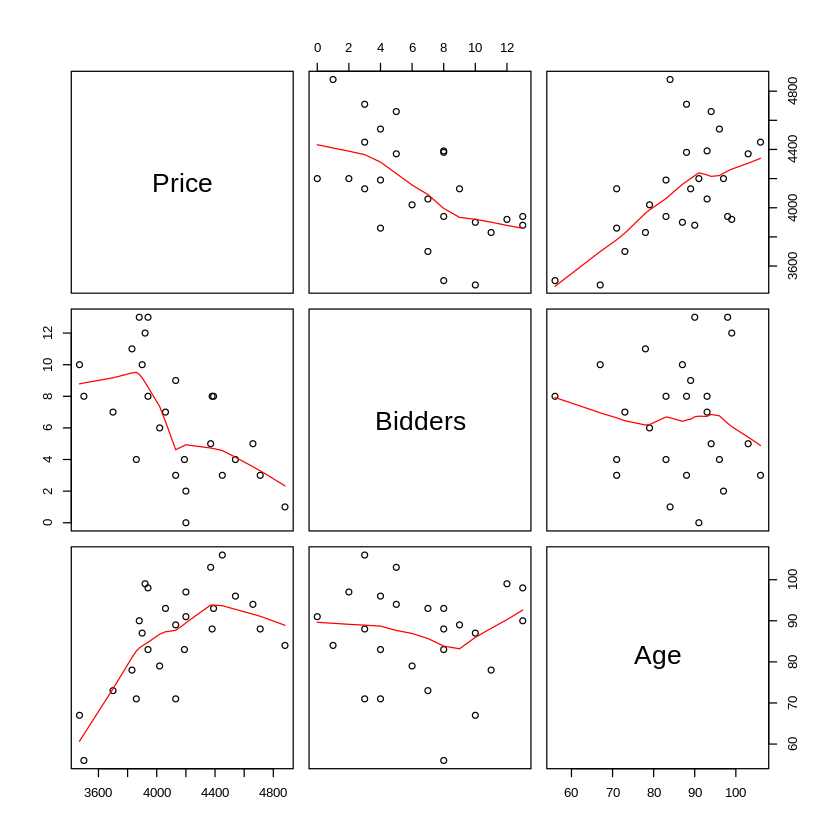

(Intercept)     Bidders         Age 
 3080.05304   -54.18854    16.28910


Call:
lm(formula = Price ~ ., data = arts)

Residuals:
    Min      1Q  Median      3Q     Max 
-362.36 -155.62  -31.93   87.91  485.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3080.053    343.885   8.957 8.62e-09 ***
Bidders      -54.189     12.281  -4.412 0.000220 ***
Age           16.289      3.784   4.305 0.000287 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 222.1 on 22 degrees of freedom
Multiple R-squared:  0.6478,	Adjusted R-squared:  0.6158 
F-statistic: 20.23 on 2 and 22 DF,  p-value: 1.034e-05


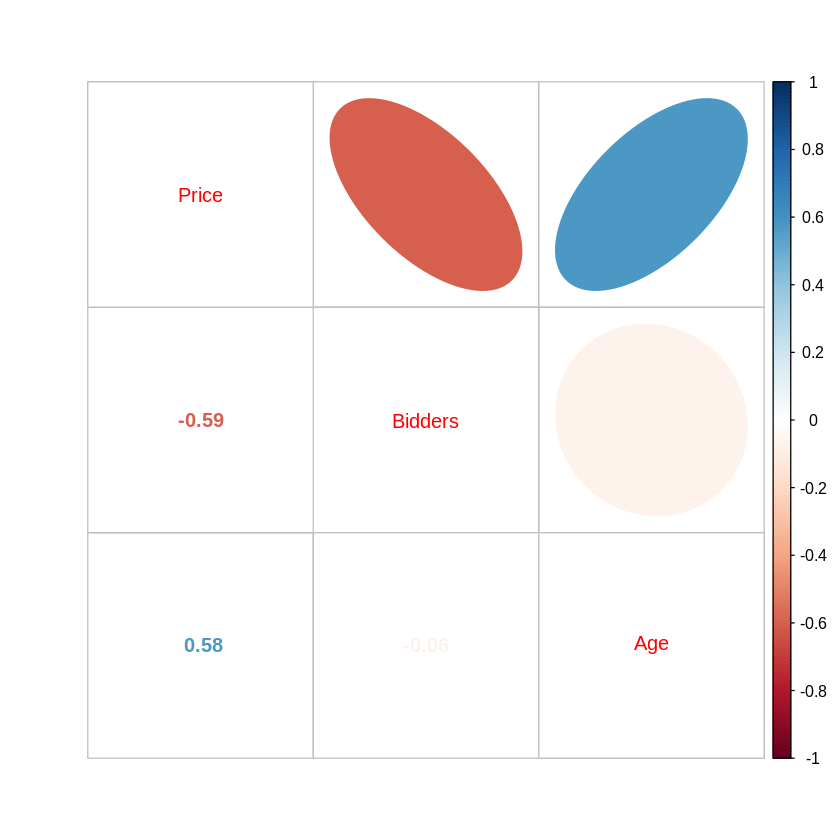

In [18]:
arts <- art[, 2:4]
pairs(arts, panel=panel.smooth)
cor <- cor(arts)
corrplot.mixed(cor, upper='ellipse', lower='number')

m <- lm(Price~., arts)
coef(m)
summary(m)

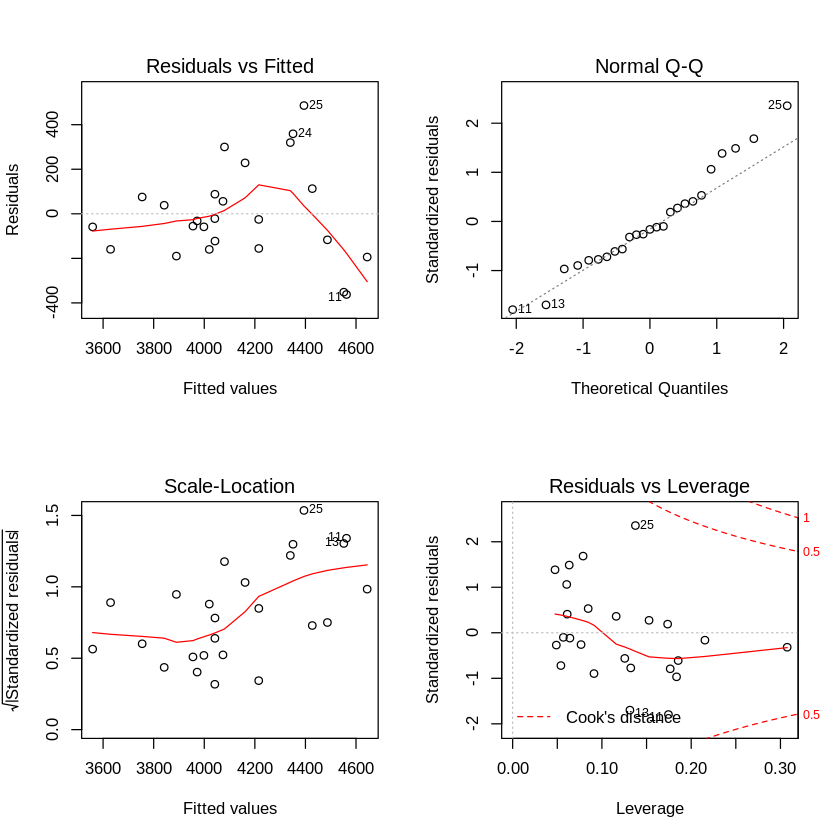

In [19]:
# 수정된 결정계수 : 0.6158
# p-value: 1.034e-05
# Pr(>|t|)
# y = 54.19bid + 16.28age + 3080
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))  
plot(m)
par(.opar)
# => 회귀모형 적합성은 몇몇의 이상치때문에 선형성,정규성,분산성,독립성에 문제가 있는것으로 보임

### 다중공선성

* 회귀분석시 종속변수와 독립변수간의 상관여부를 판단했었는데, 간혹 독립변수들끼리 서로 상관되는 경우가 발생
* 서로 비슷한 성격을 가지는 독립변수들이 존재할때 주로 발생</br>
    => '다중공선성'의 문제라고 말함

* 대학교 합격여부를 예측하기 위해 고등학교 성적과 석차를 사용하는 경우
* 두 독립변수간의 상관계수가 -0.7~0.7사이면 사용해도 좋음
* 다중공선성 여부를 파악하려면 팽창계수를 알아봐야 함
  + 팽창계수가 10이상이면 해당 독립변수는 제외시킴
* r에서는 car 패키지의 vif함수를 사용

In [20]:
# ex) 시멘트가 굳어지며 발생하는 열의 양에 영향을 미치는 4가지 성분에 대해 회귀분석 실시 cement.txt
x1 <- c(7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10)
x2 <- c(26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68)
x3 <- c(6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8)
x4 <- c(60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12)
y <- c(78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4)
cement <- data.frame(x1,x2,x3,x4,y)
head(cement)

,x1,x2,x3,x4,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2


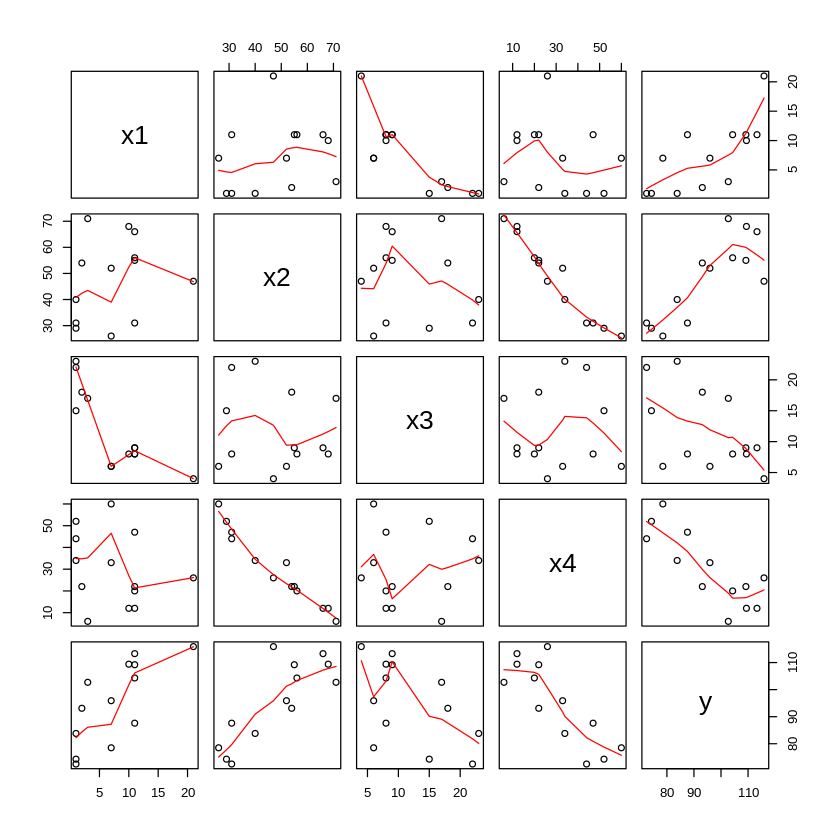

(Intercept)          x1          x2          x3          x4 
 62.4053693   1.5511026   0.5101676   0.1019094  -0.1440610


Call:
lm(formula = y ~ ., data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


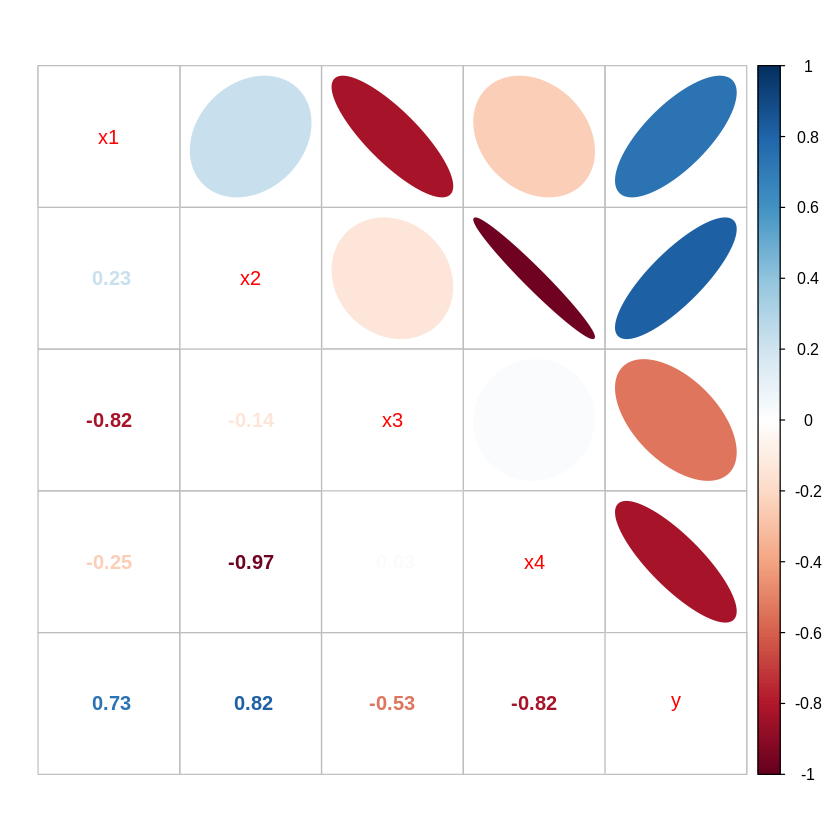

In [21]:
pairs(cement, panel=panel.smooth)
cor <- cor(cement)
corrplot.mixed(cor, upper='ellipse', lower='number')
m <- lm(y~., cement)
coef(m)
summary(m)

In [22]:
# 수정된 결정계수 : 0.9736
# p-value: 4.756e-07
# Pr(>|t|) : 유의미한 회귀계수 없음
# => 다중공선성이 원인일 수 있음

# install.packages('car')   # 터미널에서 설치
library(car)

vif(m)

Loading required package: carData



x1        x2        x3        x4 
 38.49621 254.42317  46.86839 282.51286

In [23]:
# x1 38.49, x2 254.42, x3 46.86, x4 282.51
# x1, x3의 팽창계수가 x2, x4 팽창계수보다 작음
m2 <- lm(y ~ x1+x3)  # x1, x3
summary(m2)


Call:
lm(formula = y ~ x1 + x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.142  -7.779   2.558   7.226  15.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  72.3490    17.0528   4.243  0.00171 **
x1            2.3125     0.9598   2.409  0.03672 * 
x3            0.4945     0.8814   0.561  0.58717   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.08 on 10 degrees of freedom
Multiple R-squared:  0.5482,	Adjusted R-squared:  0.4578 
F-statistic: 6.066 on 2 and 10 DF,  p-value: 0.01883


In [24]:
m3 <- lm(y ~ x2+x4)  # x2, x4
summary(m3)


Call:
lm(formula = y ~ x2 + x4)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.193  -7.260   0.652   4.104  19.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  94.1601    56.6271   1.663    0.127
x2            0.3109     0.7486   0.415    0.687
x4           -0.4569     0.6960  -0.657    0.526

Residual standard error: 9.321 on 10 degrees of freedom
Multiple R-squared:  0.6801,	Adjusted R-squared:  0.6161 
F-statistic: 10.63 on 2 and 10 DF,  p-value: 0.003352


In [25]:
m4 <- lm(y ~ x1+x2)  # x1, x2 (!!)
summary(m4)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
x1           1.46831    0.12130   12.11 2.69e-07 ***
x2           0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09


In [26]:
m5 <- lm(y ~ x3+x4)  # x3, x4  (!!)
summary(m5)


Call:
lm(formula = y ~ x3 + x4)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2715 -2.8916 -0.6439  1.5115  8.2566 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 131.28241    3.27477  40.089 2.23e-12 ***
x3           -1.19985    0.18902  -6.348 8.38e-05 ***
x4           -0.72460    0.07233 -10.018 1.56e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.192 on 10 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9223 
F-statistic: 72.27 on 2 and 10 DF,  p-value: 1.135e-06


In [27]:
m6 <- lm(y ~ x1+x2+x3)  # x1, x2, x3
summary(m6)


Call:
lm(formula = y ~ x1 + x2 + x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2543 -1.4726  0.1755  1.5409  3.9711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 48.19363    3.91330  12.315 6.17e-07 ***
x1           1.69589    0.20458   8.290 1.66e-05 ***
x2           0.65691    0.04423  14.851 1.23e-07 ***
x3           0.25002    0.18471   1.354    0.209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.312 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.3 on 3 and 9 DF,  p-value: 3.367e-08


In [28]:
# 결론 : x1,x2,x3,x4를 이용해서 회귀분석을 하는 것보다는
# 다중공선성을 최소로 하는 변수들만 선택해서 분석하는 것이
# 회귀모형의 유의성을 보장하는데 도움이 됨

# ex) 자동차 부품도매상 관리자는
# 각 지역의 연매출액을 추정하려 함
# 지역내 아웃렛수, 차량등록수, 개인 총소득,
# 자동차 사용년수, 매니저수 등이 총매출에
# 어떤 영향을 주는지 회귀분석을 실시하시오 (carparts.txt)

In [29]:
car <- read.csv('csv/carparts.txt', sep='\t')

head(car)

,sales,outlet,users,income,year,manager
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,37.702,"1,739",9.27,85.4,3.5,9
2,24.196,"1,224",5.86,60.7,5.0,5
3,32.055,"1,846",8.81,68.1,4.4,7
4,3.611,120,3.81,20.2,4.0,5
5,17.625,"1,096",10.31,33.8,3.5,7
6,45.919,"2,290",11.62,95.1,4.1,13


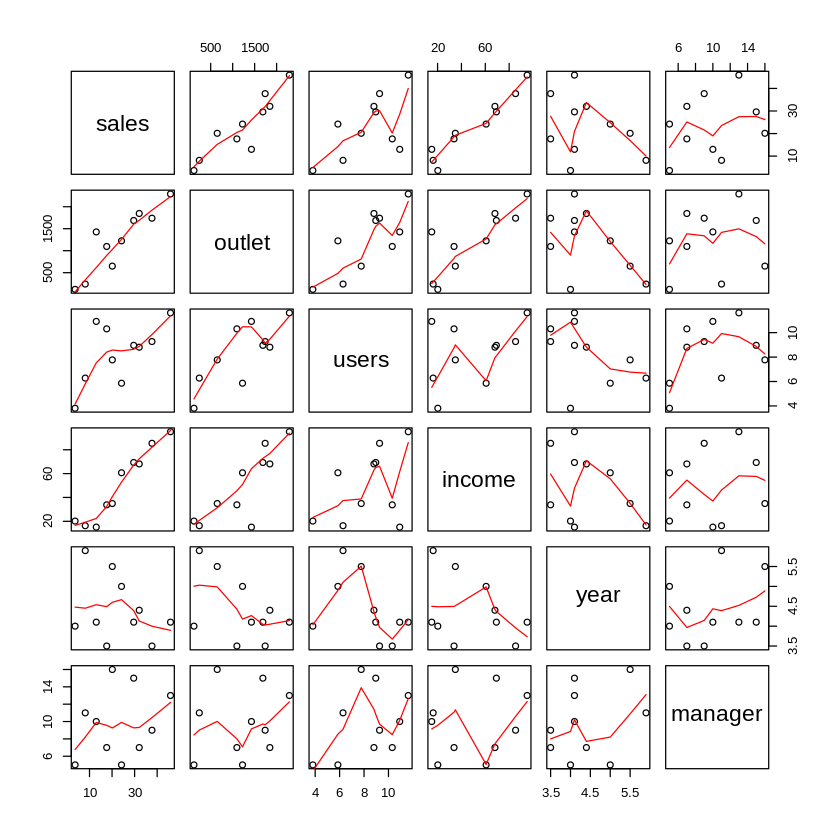


Call:
lm(formula = sales ~ ., data = car)

Residuals:
       1        2        3        4        5        6        7        8 
 0.51354 -0.44897  0.92578  0.47742 -0.69353 -0.07153 -1.49467 -1.30426 
       9       10 
 1.72412  0.37211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.968e+01  5.423e+00  -3.629 0.022189 *  
outlet      -6.321e-04  2.636e-03  -0.240 0.822241    
users        1.741e+00  5.526e-01   3.150 0.034519 *  
income       4.100e-01  4.385e-02   9.351 0.000728 ***
year         2.036e+00  8.780e-01   2.319 0.081211 .  
manager     -3.466e-02  1.881e-01  -0.184 0.862813    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.507 on 4 degrees of freedom
Multiple R-squared:  0.9943,	Adjusted R-squared:  0.9873 
F-statistic: 140.4 on 5 and 4 DF,  p-value: 0.0001397


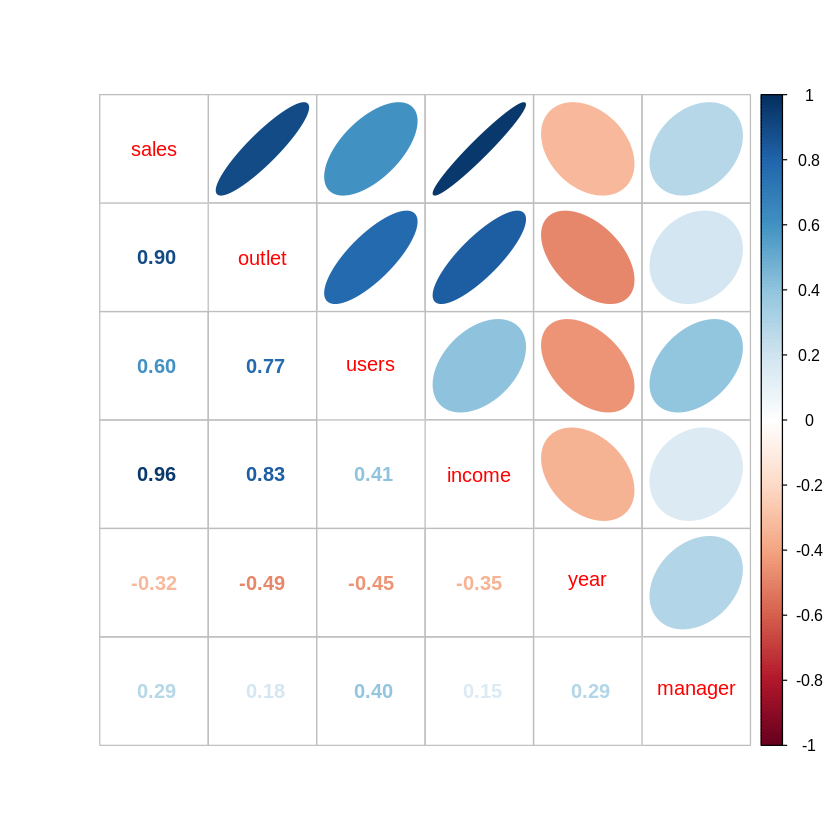

In [30]:
car$outlet <- as.character(car$outlet)
car$outlet <- gsub(',', '', car$outlet)
car$outlet <- as.integer(car$outlet)

pairs(car, panel=panel.smooth)
cor <- cor(car)
corrplot.mixed(cor,upper='ellipse', lower='number')

m <- lm(sales~., car)
summary(m)

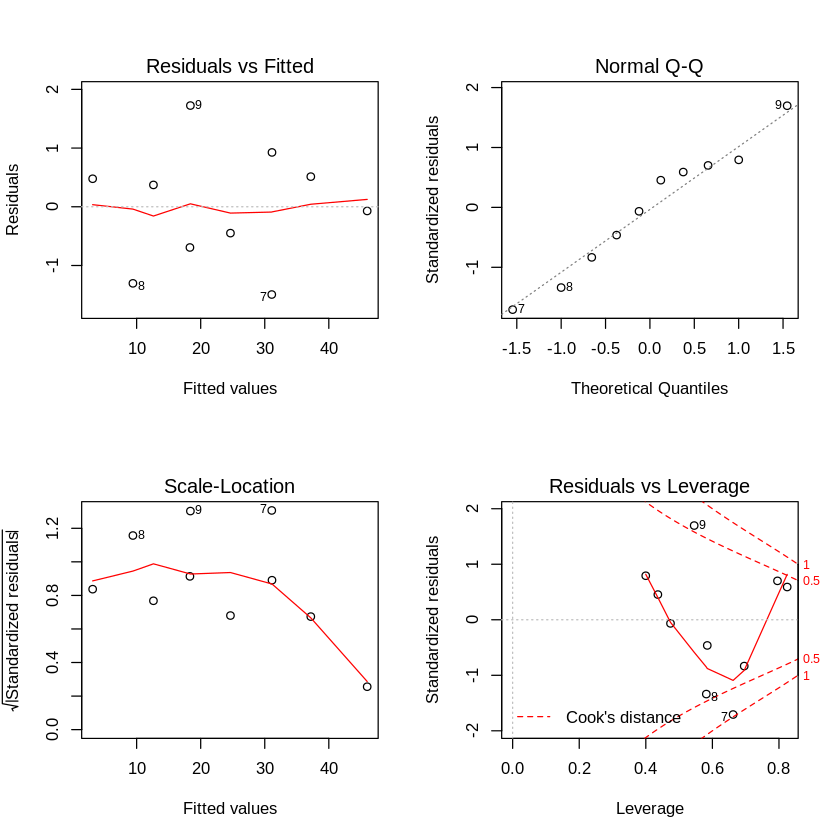

In [31]:
# R-squared:  0.9873
# p-value: 0.0001397
# Pr(>|t|) : income, users
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))  
plot(m)
par(.opar)
# => 회귀모형 적합성은 몇몇의 이상치때문에 분산성,독립성에 문제가 있는것으로 보임


In [32]:
vif(m)
# => outlet의 팽창계수가 10을 넘음 -> 다중공선성 문제 발생!

outlet     users    income      year   manager 
13.998061  7.261683  6.633062  1.992682  2.175985

In [33]:
car2 <- car[, c(1, 3:6)]
m2 <- lm(sales~., car2)
summary(m2)

# Pr(>|t|) : income, users


Call:
lm(formula = sales ~ ., data = car2)

Residuals:
       1        2        3        4        5        6        7        8 
 0.62145 -0.51436  0.81355  0.47026 -0.51176 -0.01728 -1.63989 -1.21176 
       9       10 
 1.79490  0.19489 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.11463    4.40661  -4.338  0.00744 ** 
users         1.62834    0.26502   6.144  0.00166 ** 
income        0.40055    0.01732  23.121 2.82e-06 ***
year          2.00941    0.78449   2.561  0.05056 .  
manager      -0.01545    0.15337  -0.101  0.92365    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.357 on 5 degrees of freedom
Multiple R-squared:  0.9943,	Adjusted R-squared:  0.9897 
F-statistic: 216.2 on 4 and 5 DF,  p-value: 8.731e-06


In [34]:
car3 <- car[, 1:4]
m3 <- lm(sales~., car3)
summary(m3)

# Pr(>|t|) : income, users


Call:
lm(formula = sales ~ ., data = car3)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2669 -1.4890  0.3793  0.5981  3.1853 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.878776   3.528837  -2.516 0.045529 *  
outlet      -0.001438   0.003238  -0.444 0.672466    
users        1.596861   0.583548   2.736 0.033894 *  
income       0.410755   0.054214   7.577 0.000275 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.071 on 6 degrees of freedom
Multiple R-squared:  0.9839,	Adjusted R-squared:  0.9759 
F-statistic: 122.5 on 3 and 6 DF,  p-value: 9.01e-06


In [35]:
vif(m3)

outlet     users    income 
11.180514  4.285421  5.365789

In [36]:
car4 <- car[, c(1, 3:4)]
m4 <- lm(sales~., car4)
summary(m4)


# R-squared:  0.9787
# p-value: 5.882e-07
# Pr(>|t|)  users, income


Call:
lm(formula = sales ~ ., data = car4)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9842 -1.4566  0.0324  0.8099  3.5757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.75338    2.31131  -3.355  0.01217 *  
users        1.37693    0.29063   4.738  0.00211 ** 
income       0.38954    0.02413  16.143 8.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.949 on 7 degrees of freedom
Multiple R-squared:  0.9834,	Adjusted R-squared:  0.9787 
F-statistic: 207.5 on 2 and 7 DF,  p-value: 5.882e-07


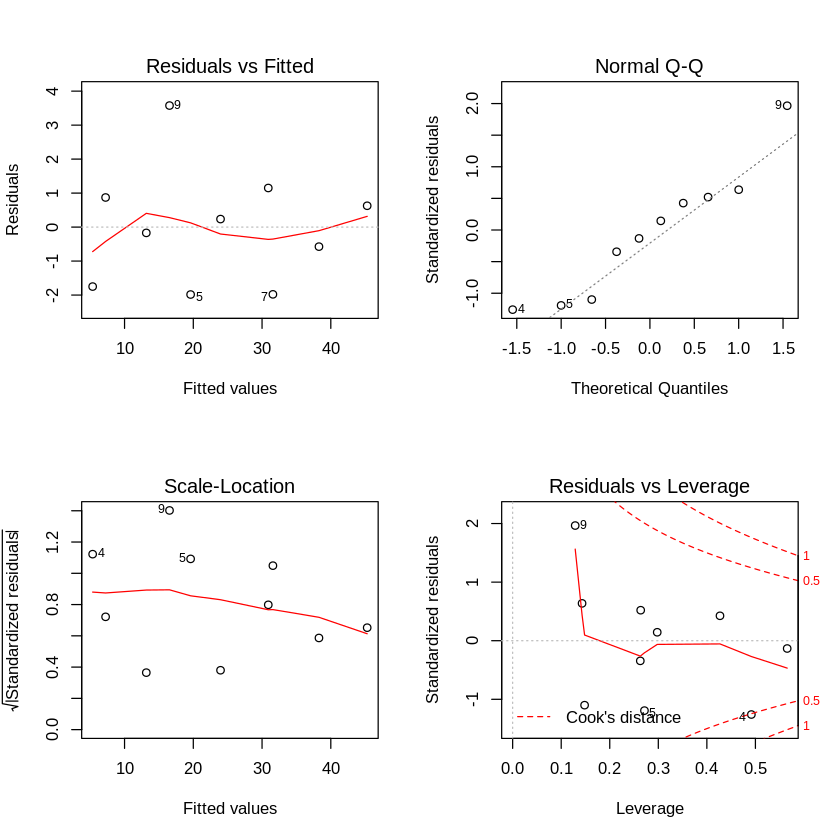

In [37]:
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))  
plot(m4)
par(.opar)

In [38]:
# => 회귀모형 적합성은 몇몇의 이상치때문에 정규성, 독립성에 문제가 있는것으로 보임

In [39]:
vif(m4)

users   income 
1.200628 1.200628

### 독립변수 최적화

* 독립변수가 많을때 유의한 계수를 포함시키고 유의하지 않은 계수는 제외시켜 작성한 회귀방정식은 간단해지고 이해하기도 쉬워짐

### 가능하다면 적은 수의 독립변수를 포함하는 것이 좋음
### 변수소거법

* 다중회귀식에 포함할 수 있는 독립변수들을 효과적으로 선별할 수 있는 분석방법
* 단계적 회귀법, 단계적 변수 선택법
    + 전진소거법, 후진소거법, 최적소거법
* 전진소거법 : 중요도가 높은 변수를 하나씩 추가해가며
    - 회귀식을 작성
* 후진소거법 : 중요도가 낮은 변수를 하나씩 제거해가며
    - 회귀식을 작성            
* 최적소거법 : 전진/후진 소거법을 적절히 조합
* 이렇게 변수를 하나씩 추가/제거해가며 유의미한 독립변수를 찾는 것은 다소 불편함
* 더구나 변수의 갯수가 많아지면 시간도 많이 걸림
### step 함수를 이용하면 간편하게 해결 가능
    + => step(회귀모델, 변수범위, 소거종류)
* 소거법을 이용해서 만들어진 회귀모형에 대한 성능평가는 AIC를 이용함
  + akaike information criterion
  + AIC 값이 작으면 적절한 모형임을 의미함

In [40]:
# houses.txt 를 이용해서
# 모든 독립변수를 전진/후진/최적 소거법을 이용해서
# 적절한 회귀방정식을 작성하세요
# 전진소거법
# step(회귀모델, 변수범위, 소거종류)
step(lm(난방비~1, data=houses), scope=list(lower=~1, upper=~평균외부기온+단열재+난방사용연수),direction='forward')

Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq   RSS    AIC
+ 단열재        1   24979.6 47721 161.55
<none>                      72701 167.97
+ 난방사용연수  1    5648.1 67053 168.35

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq   RSS    AIC
+ 난방사용연수  1      6026 41695 160.85
<none>                      47721 161.55

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수




Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [41]:
# step 함수 결과 : 평균외부기온+단열재+난방사용연수
# '난방사용연수'를 포함시켰을때 AIC의 극적 변화는 미비 => 제외가능

In [42]:
summary(lm(난방비~., data=houses))


Call:
lm(formula = 난방비 ~ ., data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  427.1938    59.6014   7.168 2.24e-06 ***
평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***
단열재       -14.8309     4.7544  -3.119  0.00661 ** 
난방사용연수   6.1010     4.0121   1.521  0.14786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


In [43]:
# 후진소거법
# step(회귀모델, 변수범위, 소거종류)
step(lm(난방비~., data=houses), direction='backward')

Start:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수

               Df Sum of Sq    RSS    AIC
<none>                       41695 160.85
- 난방사용연수  1      6026  47721 161.55
- 단열재        1     25357  67053 168.35
- 평균외부기온  1     91751 133446 182.11



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [44]:
# step 함수 결과 : 평균외부기온+단열재+난방사용연수
# '난방사용연수'를 제외시켰을때 AIC의 극적 변화는 미비 => 제외가능

In [45]:
# 최적소거법
step(lm(난방비~1, data=houses),scope=list(upper=~평균외부기온+단열재+난방사용연수),direction='both')

Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq    RSS    AIC
+ 단열재        1     24980  47721 161.55
<none>                       72701 167.97
+ 난방사용연수  1      5648  67053 168.35
- 평균외부기온  1    140215 212916 187.46

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq    RSS    AIC
+ 난방사용연수  1      6026  41695 160.85
<none>                       47721 161.55
- 단열재        1     24980  72701 167.97
- 평균외부기온  1    151121 198842 188.09

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수

               Df Sum of Sq    RSS    AIC
<none>                       41695 160.85
- 난방사용연수  1      6026  47721 161.55
- 단열재        1     25357  67053 168.35
- 평균외부기온  1     91751 133446 182.11



Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [46]:
# ex) 보스톤 집값 예측
# 보스턴 외곽지역 집값과 그것들과 관련있는
# 여러 요소를 변수로 정의 범죄율, 단위면적당 거주주민수, 비상업지구 거주민, 강근처 주택여부, 오염도 비율, 공실비율, 노후주택 비율, 도로 접근성비율, 재산세 납부비율, 학생/교사 비율, 유색인종 비율,
# 하위계층 비율, 본인소유 주택가격 최종적으로 집값에 영향을 주는 요인은?


Attaching package: ‘MASS’


The following object is masked _by_ ‘.GlobalEnv’:

    cement




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


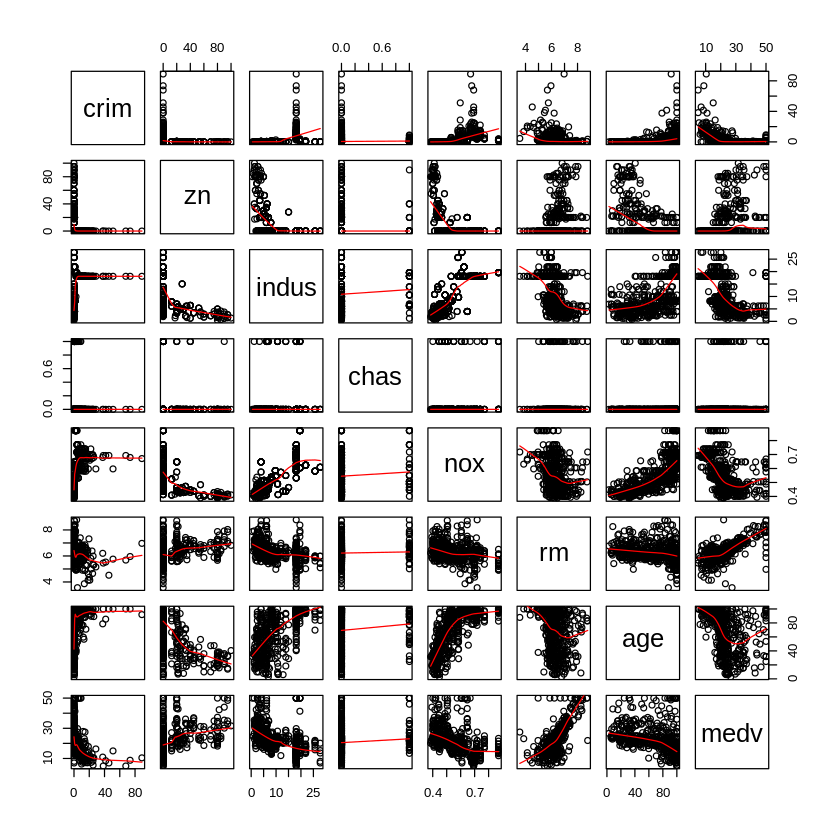

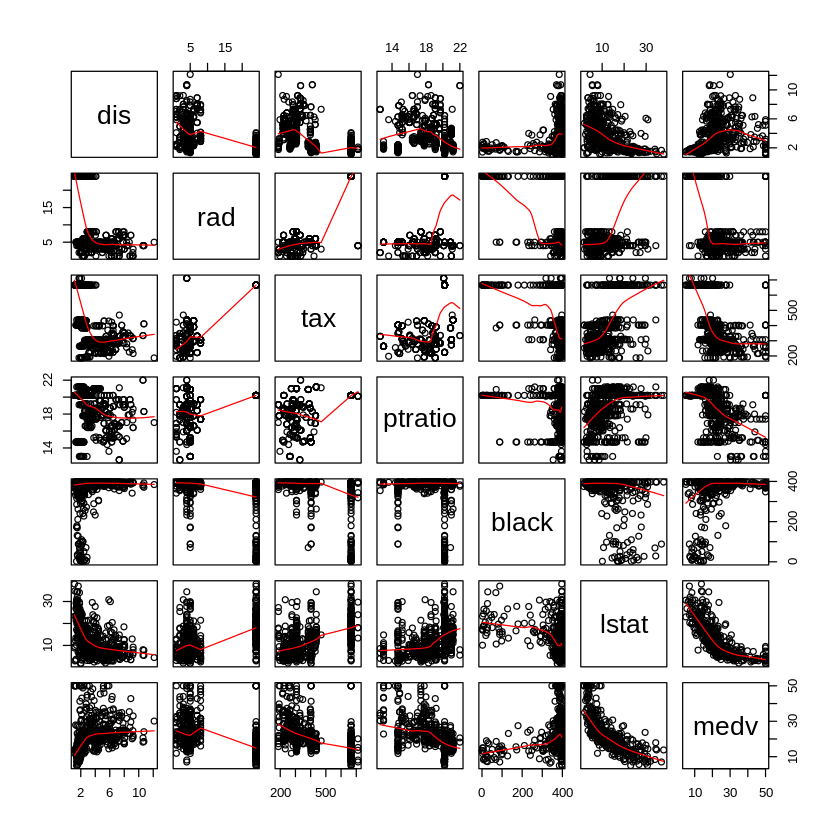

In [47]:
library(MASS)
head(Boston)

pairs(Boston[,c(1:7, 14)], panel=panel.smooth)
pairs(Boston[,c(8:13, 14)], panel=panel.smooth)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

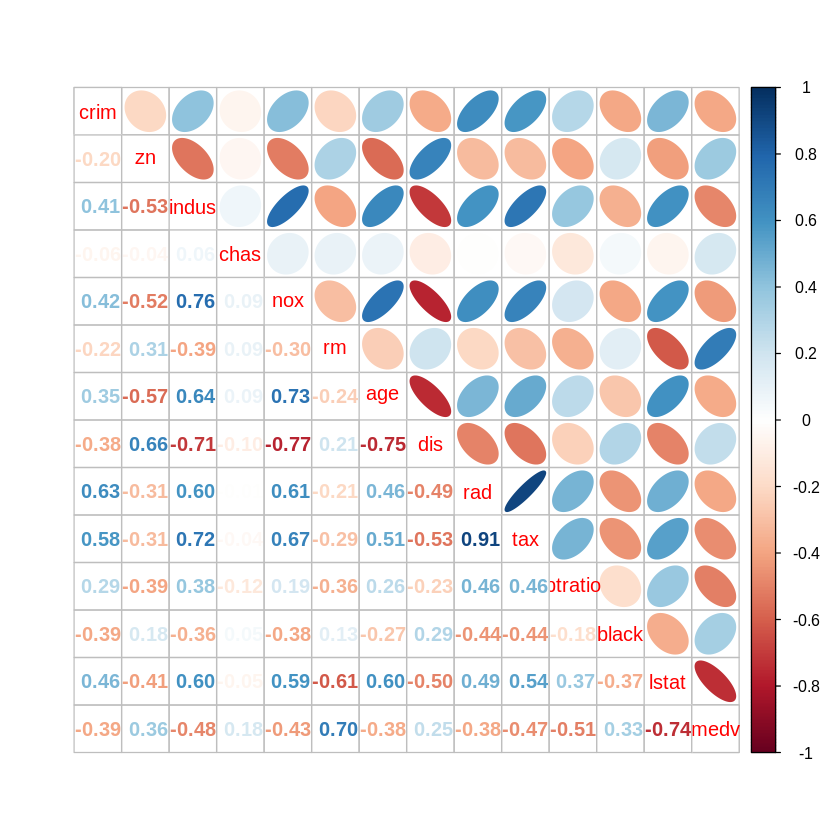

In [48]:
cor <- cor(Boston)
corrplot.mixed(cor, upper='ellipse', lower='number')

m <- lm(medv~., Boston)
summary(m)

In [49]:
# Adjusted R-squared:  0.7338
# p-value: < 2.2e-16
# Pr(>|t|) : indus, age 만 제외하고 모든 회귀계수는 유의함
vif(m)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

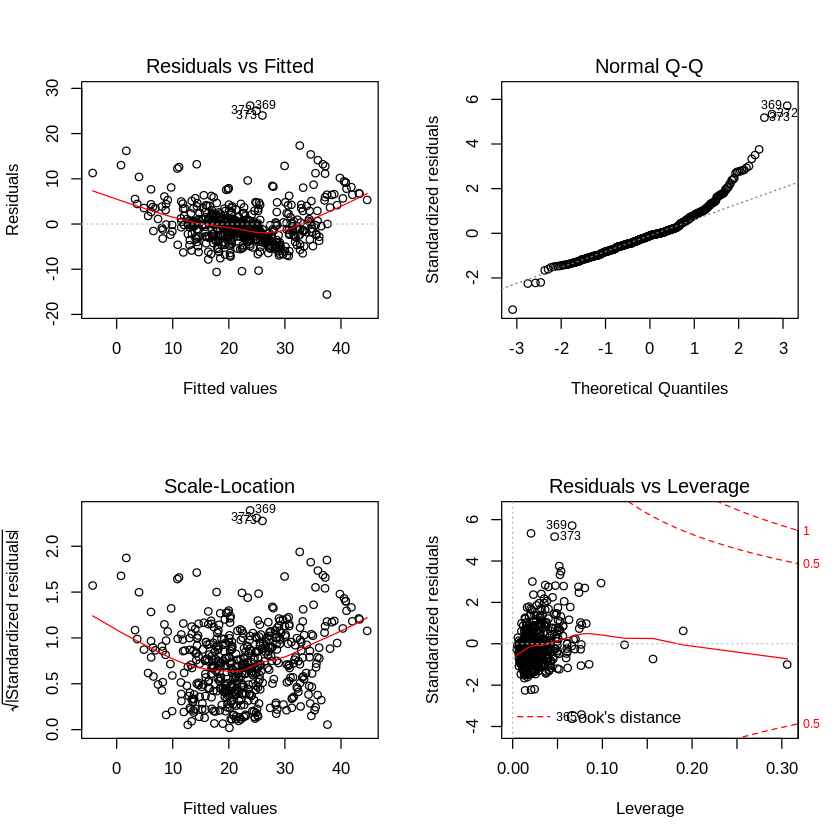

In [50]:
# rad, tax의 팽창계수가 다소 높음
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))  
plot(m)
par(.opar)

+ 몇몇 이상치로 인해 리버레지 효과가 보이지만
+ 선형성/정규성/등분산성/독립성에는 다소 문제가 없어 보임

In [51]:
# 수동 변수 최적화 : 후진소거법
m <- lm(medv~., Boston)
summary(m)
#=> 0.7338 : indus, age 계수가 유의확률이 낮음 => 제거


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [52]:
m <- lm(medv~. -indus-age, Boston)
summary(m)      
# => 0.7348 : crim, chas 계수가 유의확률이 낮음 => 제거


Call:
lm(formula = medv ~ . - indus - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d

In [53]:
m <- lm(medv~. -indus-age-crim-chas, Boston)
summary(m)  
# => 0.724 : zn 계수가 유의확률이 낮음 => 제거


Call:
lm(formula = medv ~ . - indus - age - crim - chas, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8917  -2.7329  -0.4988   1.8547  26.6433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.459724   5.158054   6.875 1.87e-11 ***
zn            0.041396   0.013737   3.013 0.002715 ** 
nox         -15.502932   3.583879  -4.326 1.84e-05 ***
rm            3.879580   0.414180   9.367  < 2e-16 ***
dis          -1.451648   0.187926  -7.725 6.26e-14 ***
rad           0.252412   0.061778   4.086 5.12e-05 ***
tax          -0.012360   0.003427  -3.606 0.000342 ***
ptratio      -0.968703   0.131248  -7.381 6.69e-13 ***
black         0.010842   0.002705   4.008 7.06e-05 ***
lstat        -0.555124   0.047699 -11.638  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.832 on 496 degrees of freedom
Multiple R-squared:  0.7289,	Adjusted R-squared:  0.724 
F-statistic: 148.2 on

In [54]:
m <- lm(medv~. -indus-age-crim-chas-zn, Boston)
summary(m)  
# => 0.7195 : tax 계수가 유의확률이 낮음 => 제거


Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2124  -2.8908  -0.7128   1.8377  26.9930 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.184181   5.194165   6.966 1.04e-11 ***
nox         -16.727959   3.589578  -4.660 4.06e-06 ***
rm            4.060112   0.413142   9.827  < 2e-16 ***
dis          -1.170973   0.164541  -7.117 3.89e-12 ***
rad           0.243650   0.062209   3.917 0.000102 ***
tax          -0.010353   0.003389  -3.055 0.002373 ** 
ptratio      -1.106042   0.124077  -8.914  < 2e-16 ***
black         0.010811   0.002727   3.965 8.43e-05 ***
lstat        -0.552298   0.048076 -11.488  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.871 on 497 degrees of freedom
Multiple R-squared:  0.7239,	Adjusted R-squared:  0.7195 
F-statistic: 162.9 on 8 and 497 DF,  p-value: < 2.2e-16


In [55]:
m <- lm(medv~. -indus-age-crim-chas-zn-tax, Boston)
summary(m)  
# => 0.7148 : rad 계수가 유의확률이 낮음 => 제거



Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn - tax, 
    data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5815  -3.0628  -0.5647   1.8793  26.8951 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.590152   5.210940   6.638 8.33e-11 ***
nox         -19.132370   3.531397  -5.418 9.41e-08 ***
rm            4.187924   0.414442  10.105  < 2e-16 ***
dis          -1.174139   0.165909  -7.077 5.03e-12 ***
rad           0.091038   0.037379   2.436   0.0152 *  
ptratio      -1.144129   0.124477  -9.191  < 2e-16 ***
black         0.011203   0.002746   4.079 5.26e-05 ***
lstat        -0.557822   0.048443 -11.515  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.912 on 498 degrees of freedom
Multiple R-squared:  0.7187,	Adjusted R-squared:  0.7148 
F-statistic: 181.8 on 7 and 498 DF,  p-value: < 2.2e-16


In [56]:
m <- lm(medv~. -indus-age-crim-chas-zn-tax-rad, Boston)
summary(m)  
# => 0.712


Call:
lm(formula = medv ~ . - indus - age - crim - chas - zn - tax - 
    rad, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3352  -2.9006  -0.7175   1.7552  28.0066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.516970   4.959607   6.153 1.56e-09 ***
nox         -15.842368   3.278907  -4.832 1.81e-06 ***
rm            4.354807   0.410753  10.602  < 2e-16 ***
dis          -1.159603   0.166619  -6.960 1.08e-11 ***
ptratio      -1.012059   0.112597  -8.988  < 2e-16 ***
black         0.009578   0.002677   3.578 0.000381 ***
lstat        -0.545497   0.048415 -11.267  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.936 on 499 degrees of freedom
Multiple R-squared:  0.7154,	Adjusted R-squared:  0.712 
F-statistic:   209 on 6 and 499 DF,  p-value: < 2.2e-16


In [57]:
# 독립변수 7개를 제거해서 만든 회귀모형의 결정력은 0.7338 => 0.712로 변화했음
# 남아있는 변수들로 데이터프레임을 만들고 회귀분석/적합성 검정 실시

boston <- Boston[, c(5,6,8,11:14)]
m <- lm(medv~., boston)
summary(m)


Call:
lm(formula = medv ~ ., data = boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3352  -2.9006  -0.7175   1.7552  28.0066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.516970   4.959607   6.153 1.56e-09 ***
nox         -15.842368   3.278907  -4.832 1.81e-06 ***
rm            4.354807   0.410753  10.602  < 2e-16 ***
dis          -1.159603   0.166619  -6.960 1.08e-11 ***
ptratio      -1.012059   0.112597  -8.988  < 2e-16 ***
black         0.009578   0.002677   3.578 0.000381 ***
lstat        -0.545497   0.048415 -11.267  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.936 on 499 degrees of freedom
Multiple R-squared:  0.7154,	Adjusted R-squared:  0.712 
F-statistic:   209 on 6 and 499 DF,  p-value: < 2.2e-16


In [58]:
# step함수로 변수소거 실시
step(lm(medv~., Boston), direction='backward')

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- black    1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1    243.20 11322 1596.6
- zn       1


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Coefficients:
(Intercept)         crim           zn         chas          nox           rm  
  36.341145    -0.108413     0.045845     2.718716   -17.376023     3.801579  
        dis          rad          tax      ptratio        black        lstat  
  -1.492711     0.299608    -0.011778    -0.946525     0.009291    -0.522553  


### 독립변수 제거를 위한 또 다른 방법
* regsubsets : n개의 변수가 있을때 각 변수를 더하거나 빼서 2n개의 모델을 만들어 적절한 회귀모델을 생성해 줌
* regsubsets 함수를 이용해서 회귀모델의 성능을 평가할때의 척도는 BIC를 이용

In [59]:
# install.packages('leaps')
library(leaps)

In [60]:
# 난방비 회귀모형을 regsubsets함수를 이용해서 분석
m <- regsubsets(난방비~., houses, method='exhaustive')

In [61]:
summary(m)

Subset selection object
Call: regsubsets.formula(난방비 ~ ., houses, method = "exhaustive")
3 Variables  (and intercept)
             Forced in Forced out
평균외부기온     FALSE      FALSE
단열재           FALSE      FALSE
난방사용연수     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: exhaustive
         평균외부기온 단열재 난방사용연수
1  ( 1 ) "*"          " "    " "         
2  ( 1 ) "*"          "*"    " "         
3  ( 1 ) "*"          "*"    "*"         

In [62]:
summary(m)$bic     # 회귀모형의 적합수치

[1] -15.49942 -20.92321 -20.62724

In [63]:
summary(m)$adjr2   # 회귀모형 결정계수

[1] 0.6395770 0.7494996 0.7674520

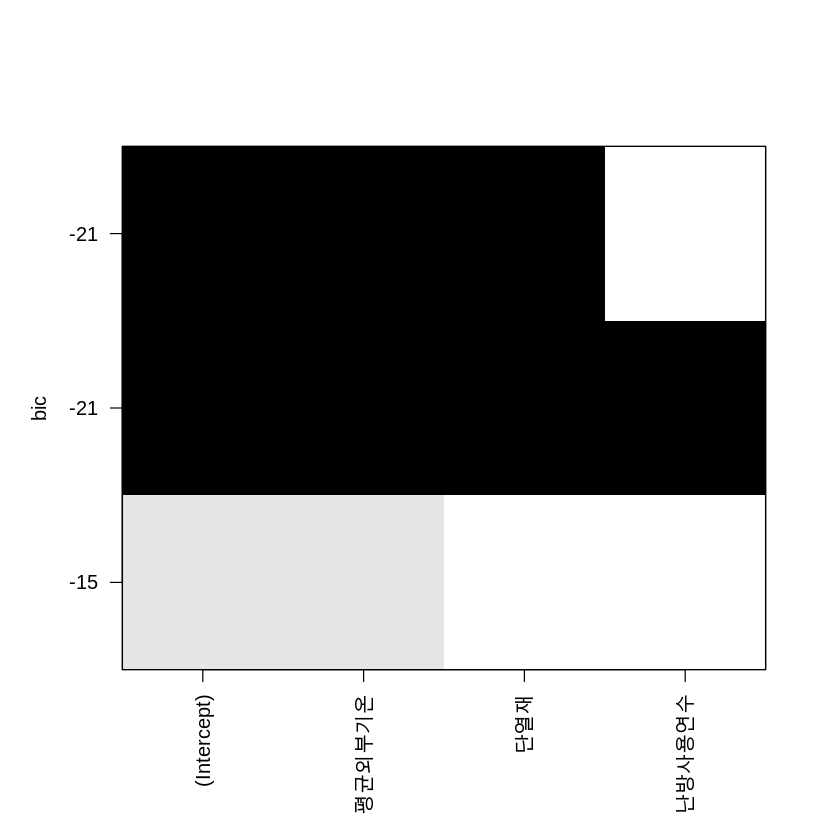

In [64]:
plot(m, scale='bic')

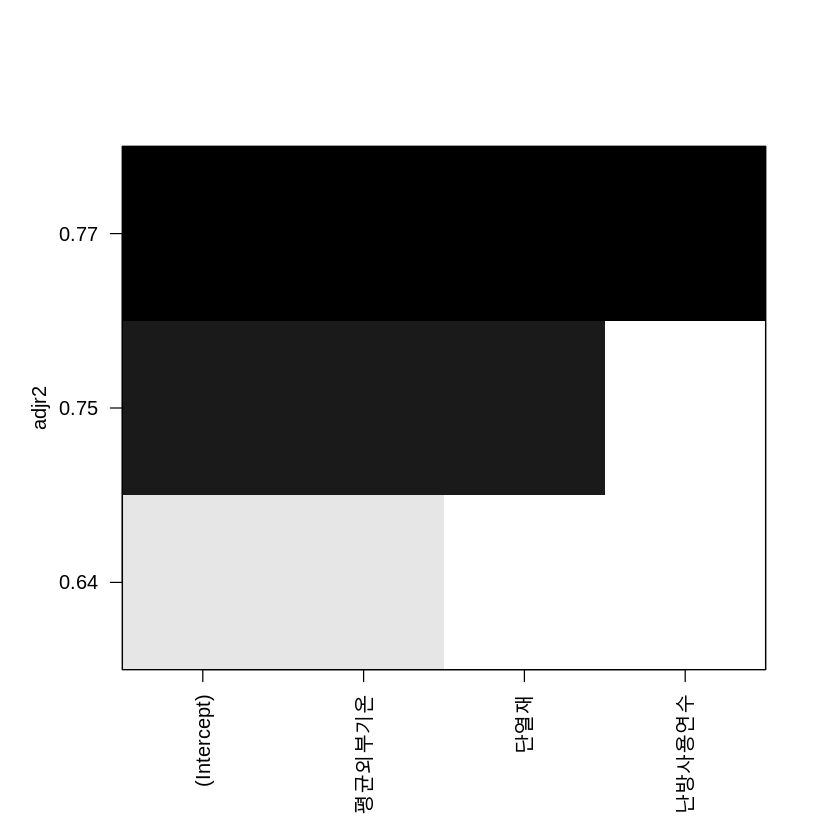

In [65]:
plot(m, scale='adjr2')

In [66]:
# Boston 회귀모형을 regsubsets함수를 이용해서 분석
m <- regsubsets(medv~., Boston, method='exhaustive')

In [67]:
summary(m)

Subset selection object
Call: regsubsets.formula(medv ~ ., Boston, method = "exhaustive")
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 ) " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 ) " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 ) " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " "   "*"  
5  ( 1 ) " "  " " " "   " "  "*" "*" " " "*" "

In [68]:
summary(m)$bic

[1] -385.0521 -496.2582 -549.4767 -561.9884 -585.6823 -592.9553 -598.2295
[8] -600.1663

In [69]:
summary(m)$adjr2

[1] 0.5432418 0.6371245 0.6767036 0.6878351 0.7051702 0.7123567 0.7182560
[8] 0.7222072

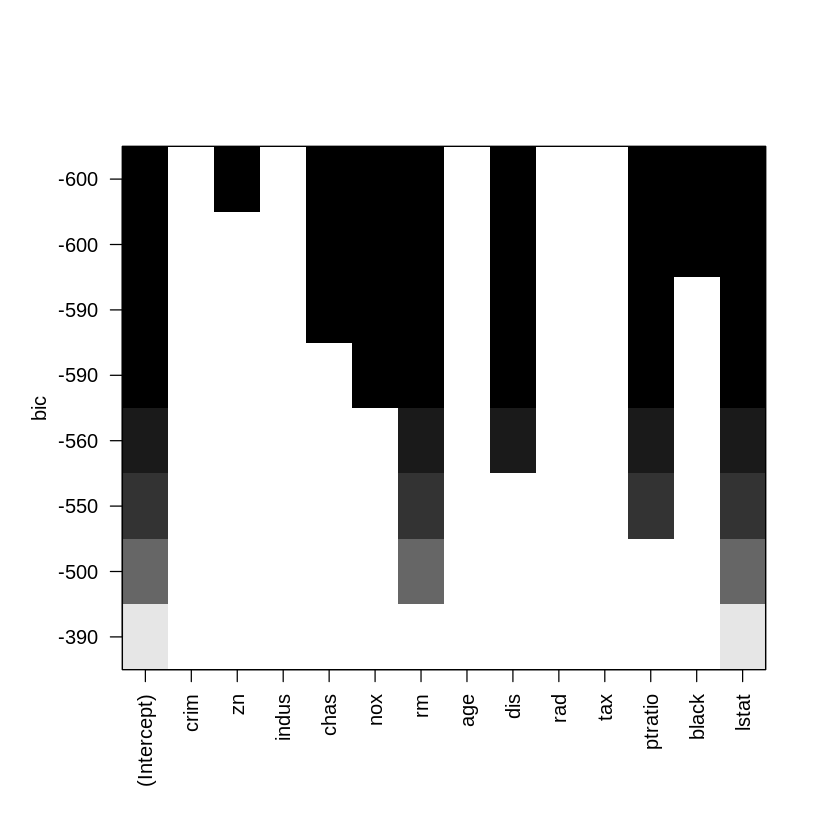

In [70]:
plot(m, scale='bic')

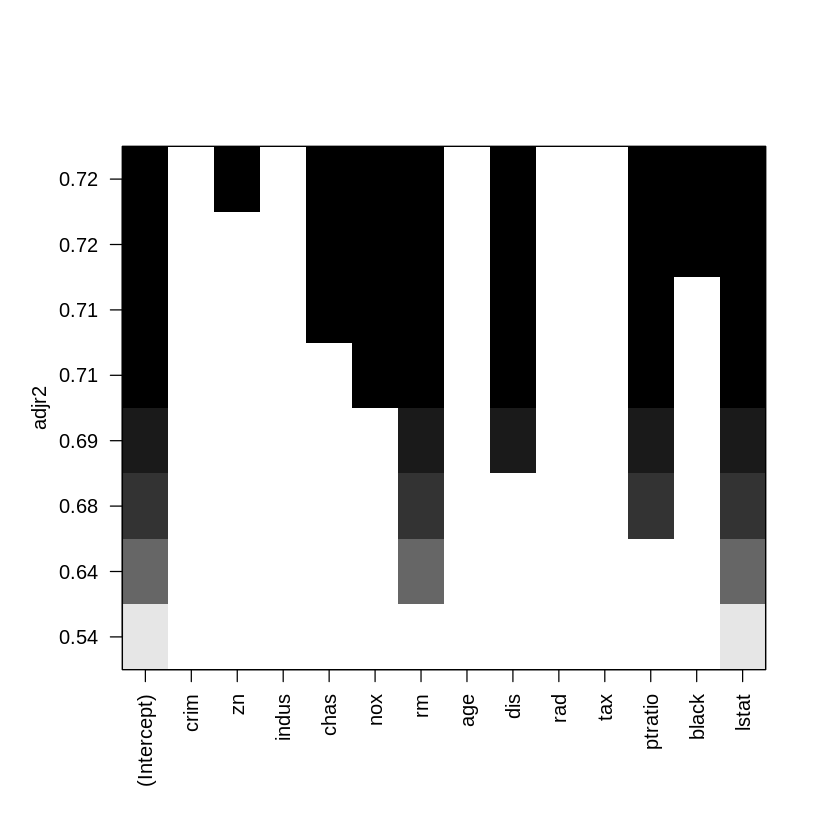

In [71]:
plot(m, scale='adjr2')